# Проект "Информационная безопасность"

Проект:

Компания онлайн-сервис с высоким уровнем входящего трафика имеет специализированный отдел безопасности, который занимается фильтрацией и анализом трафика. Сотрудники этого отдела обратились за помощью в автоматизации выявления аномального и злонамеренного трафика. 


**ЗАДАЧА** - разработать модель, которая будет классифицировать трафик на нормальный и злонамеренный, включая следующие типы атак: DDoS, SQL-инъекции, брутфорс, вредоносные программы и т.д.



Задача

- 🔸Разработать модель, которая будет классифицировать трафик на нормальный и злонамеренный. При этом модель должна работать максимально качественно, так как цена ошибки может быть очень высока.
- 🔸Оценить качество модели по различным метрикам классификации: precision, recall, f1_score, accuracy.
 - 🔸(*) Деплой: разработать REST API сервис, который будет принимать на вход данные трафика и возвращать класс этого трафика.


🚀 NEXT STEPS

- 🔸Загрузить данные
- 🔸Провести EDA
- 🔸Построить baseline
- 🔸Построить максимально качественную модель
- 🔸(*) Собрать REST API сервис


In [1]:
import sys
sys.executable


'/Users/olgafomina/opt/anaconda3/envs/ds_practicum_env/bin/python'

## Анализ данных 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV, train_test_split)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline, make_pipeline



RANDOM_STATE = 12345
from math import ceil

In [2]:
try:
    data = pd.read_csv('/datasets/network_traffic_data.csv.csv')   
except:
    data = pd.read_csv('network_traffic_data.csv')


In [1]:
print('ok')

ok


In [5]:
data.head(5)

Destination Port   Flow Duration   Total Fwd Packets  \
0                 80         5480074                   3   
1                443          711977                   9   
2                 53          153398                   2   
3                 53           57660                   1   
4               8446             767                   3   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                           12   
1                       10                          703   
2                        2                           80   
3                        1                           46   
4                        1                           43   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                          3950                     267   
2                           224                      40   
3                           128                      46   
4                             6                      31   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       0                    4.000                   3.465   
1                       0                   78.100                 103.300   
2                      40                   40.000                   0.000   
3                      46                   46.000                   0.000   
4                       6                   14.336                  14.440   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                     32          0.0          0.0            0   
2  ...                     20          0.0          0.0            0   
3  ...                     20          0.0          0.0            0   
4  ...                     20          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0            0        0.0        0.0          0          0  BENIGN  
1            0        0.0        0.0          0          0  BENIGN  
2            0        0.0        0.0          0          0  BENIGN  
3            0        0.0        0.0          0          0  BENIGN  
4            0        0.0        0.0          0          0  BENIGN  

[5 rows x 79 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539616 entries, 0 to 539615
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             539616 non-null  int64  
 1    Flow Duration                539616 non-null  int64  
 2    Total Fwd Packets            539616 non-null  int64  
 3    Total Backward Packets       539616 non-null  int64  
 4   Total Length of Fwd Packets   539616 non-null  int64  
 5    Total Length of Bwd Packets  539616 non-null  int64  
 6    Fwd Packet Length Max        539616 non-null  int64  
 7    Fwd Packet Length Min        539616 non-null  int64  
 8    Fwd Packet Length Mean       539616 non-null  float64
 9    Fwd Packet Length Std        539616 non-null  float64
 10  Bwd Packet Length Max         539616 non-null  int64  
 11   Bwd Packet Length Min        539616 non-null  int64  
 12   Bwd Packet Length Mean       539616 non-nul

In [7]:
#просмотр общей информации
print('Number of Examples = {}\n'.format(data.shape[0]))
print('Shape = {}\n'.format(data.shape))
print(data.columns)


Number of Examples = 539616

Shape = (539616, 79)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
      

Датасет содержит 539616 наблюдений и 79 признаков. 

In [6]:
#modify column names based on PEP-8 requirements
#df.columns = (df.columns
#                        .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
#                        .str.replace(' ', '_')
#                        .str.lower())
#df.columns

In [8]:
#Количество дубликатов
print('Количество дубликатов: {:.0f}'.format(data.duplicated().sum()))
      
print ('Количество пропусков: {:.0f}'.format(data.isna().sum().sum()))

print('Количество бесконеч.значений: {:.0f}'.format(data.isin([float('inf'), float('-inf')]).values.sum()))
print()
#столбцы со значением NaN
print('столбцы со значением NaN')
print(data.isnull().sum()[data.isna().sum()>0])
print()
#столбцы со значением "isinf"
print('столбцы со значением "isinf"')
print(data.isin([float('inf'), float('-inf')]).sum()[data.isin([float('inf'), float('-inf')]).sum()>0])

Количество дубликатов: 64601
Количество пропусков: 488
Количество бесконеч.значений: 980

столбцы со значением NaN
Flow Bytes/s    488
dtype: int64

столбцы со значением "isinf"
Flow Bytes/s       246
 Flow Packets/s    734
dtype: int64


In [9]:
# Выведем необходимую информацию по датасету
print('\033[94m  \033[1m {:^24s}'.format("Deep information"))
info_1 = pd.DataFrame(index=data.columns, columns=['rows'], data=len(data))
for col in data:
    if (pd.api.types.is_numeric_dtype(data[col])) and data[col].min() == 0:
        info_1.loc[col, "null_row"] = data.loc[data[col] == 0, col].count()
    else:
        info_1.loc[col, "null_row"] = 0
info_1["uniq"] = data.nunique()
info_1["dup_val"] = [data[i].duplicated().sum() for i in data]
info_1["dup_row"] = data.duplicated().sum()
info_1["NaN"] = data.isna().sum()
info_1["NaN,%"] = data.isna().sum() / 100
info_1["type"] = data.dtypes
info_1["inf_row"] = [data[i].isin([np.inf, -np.inf]).sum() for i in data]
info_1 = info_1.join(data.describe(include="number")["mean":].transpose())
info_1["null_row"] = pd.to_numeric(info_1["null_row"], downcast="integer")
info_1.fillna("", inplace=True)
prop = {
        "border": "0.5px solid black",
        "width": "85px",
        "text-align": "center"
    }
percent = {
        "NaN,%":"{:.2%}",
        "mean":"{:.3}",
        "std":"{:.3}",
        "min":"{:.3}",
        "25%":"{:.3}",
        "50%":"{:.3}",
        "75%":"{:.3}",
        "max":"{:.3}",
    }

display(info_1.style.format(percent).set_properties(**prop))

       Deep information    


/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.9/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.9/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/var/folders/td/pkh_8fmj3yjfn1g8h1073hkw0000gn/T/ipykernel_15231/2317814206.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  info_1.fillna("", inplace=True)


Общая таблица наглядно отображает, что в данных
- 64601 дубликатов; 
- Flow Bytes/s, Flow Packets/s содержат бесконечные значения (246/734)
- Flow Bytes/s  содержит пустые значения (488 строк)
- Bwd PSH Flags,Bwd URG Flags, Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk, Bwd Avg Bytes/Bulk, Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate -  все значения во всех данных равны 0
- Таргет Label имеет 15 значений( тип данных object)
- данные имеют очень большой разброс 



In [9]:
# look through the distribution of data

#df_num = df.select_dtypes("number")
#fig = plt.figure(figsize=(14,8))
#sfigs = fig.subfigures(round(len(df_num.columns)/4), 4)
#for i, axes in enumerate(sfigs.flat):
#    try:
#        axes.suptitle(df_num.columns[i])
#       if len(df.iloc[:,i]) > 0:
#            ax_1= axes.subplots(2, 1, sharex=True, 
#                            gridspec_kw={"height_ratios": (.15, .85)})
#            sns.boxplot(df[df_num.columns[i]], orient="h", ax=ax_1[0])
#            sns.histplot(df[df_num.columns[i]], kde=True, ax=ax_1[1])
#            plt.xlabel("")
#            plt.ylabel("")
#    except:
#        break

         Info_target       


Count  count,%
Label                                      
BENIGN                      240000     44.0
DoS Hulk                    115974     21.0
PortScan                     79660     15.0
DDoS                         64366     12.0
DoS GoldenEye                10293      2.0
FTP-Patator                   7938      1.0
SSH-Patator                   5897      1.0
DoS slowloris                 5796      1.0
DoS Slowhttptest              5499      1.0
Bot                           1966      0.0
Web Attack � Brute Force      1507      0.0
Web Attack � XSS               652      0.0
Infiltration                    36      0.0
Web Attack � Sql Injection      21      0.0
Heartbleed                      11      0.0

/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)
/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


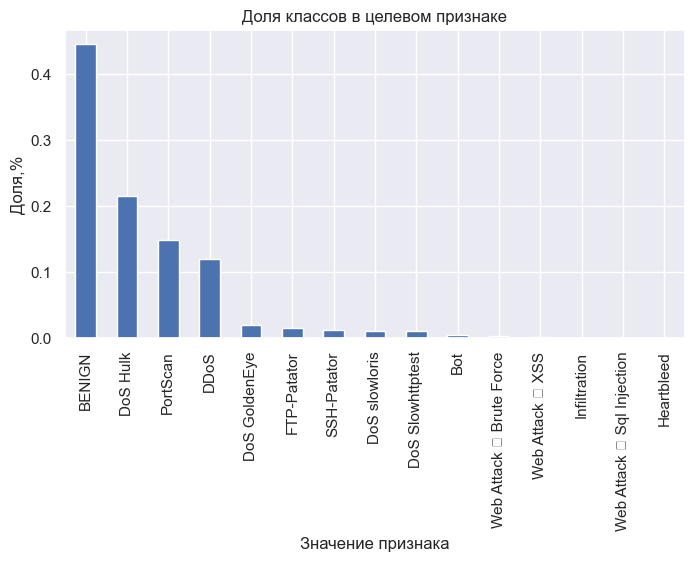

In [10]:
# Распредление значений в признаке 'Label'
print('\033[94m  \033[1m {:^24s}'.format("Info_target"))
#количество каждого значения таргета
value=data['Label'].value_counts().round(2)
value_persent = (data['Label'].value_counts(normalize=1).round(2))*100

info_t = {'Count':value,
         'count,%':value_persent}

info_target = pd.DataFrame(info_t)
display(info_target)
#график распределения
data['Label'].value_counts(normalize=1).plot(kind='bar', figsize = (8,4),rot=90,
                                            title = 'Доля классов в целевом признаке',
                                            xlabel = 'Значение признака',
                                           ylabel = 'Доля,%');

## Построение baseline на сырых данных

Построим для начала baseline  на сырых данных, используем модель catboost, так как она хорошо работает с категориальными признаками

In [11]:
#Скопируем датасет
df_raw = data.copy()

In [12]:
#Функция деления датасета 
#на выходе train(60%), valid(20%), test(20%) с разбивкой на  feauters/target

def separation (df):
    y = df['Label'] 
    X = df.drop('Label', axis=1)
    
    #деление на 
    X_train, X_t, y_train, y_t = train_test_split(X, y,test_size=0.4, random_state=RANDOM_STATE,
                                                                              stratify=y)#,
                                                                              #shuffle = True)
        
    X_valid, X_test, y_valid, y_test = train_test_split(X_t, y_t,test_size=0.5,  
                                                            random_state=RANDOM_STATE,
                                                              stratify=y_t)
    print(X_train.shape)
    print(y_train.shape)
    print(X_valid.shape)
    print(y_valid.shape)
    print(X_test.shape)
    print(y_test.shape)
    
    return (X_train, y_train, X_valid, y_valid, X_test, y_test)

In [13]:
X0_train, y0_train, X0_valid, y0_valid, X0_test, y0_test = separation(df_raw)

(323769, 78)
(323769,)
(107923, 78)
(107923,)
(107924, 78)
(107924,)


In [14]:
# Создадим и обучим модель CatBoostClassifier
model_cat_raw = CatBoostClassifier(iterations=100, learning_rate=0.1, random_seed=42,metric_period=10, loss_function='MultiClass' )
model_cat_raw.fit(X0_train, y0_train)

0:	learn: 1.5781648	total: 1.17s	remaining: 1m 56s
10:	learn: 0.4381349	total: 12.1s	remaining: 1m 37s
20:	learn: 0.1960011	total: 20.2s	remaining: 1m 16s
30:	learn: 0.1055225	total: 29.4s	remaining: 1m 5s
40:	learn: 0.0662008	total: 38s	remaining: 54.7s
50:	learn: 0.0483303	total: 46.2s	remaining: 44.4s
60:	learn: 0.0378300	total: 55.3s	remaining: 35.4s
70:	learn: 0.0320947	total: 1m 4s	remaining: 26.5s
80:	learn: 0.0275959	total: 1m 12s	remaining: 17.1s
90:	learn: 0.0237587	total: 1m 20s	remaining: 7.92s
99:	learn: 0.0216074	total: 1m 26s	remaining: 0us


In [15]:
# Получим предсказания на валид выборке
y_pred_cat_row = model_cat_raw.predict(X0_valid)
cat_row_acc = accuracy_score(y0_valid,y_pred_cat_row)
print('the accuracy of CatBoost model',cat_row_acc)

the accuracy of CatBoost model 0.9959693485169983


In [15]:

# метрики
from sklearn.metrics import classification_report 
print(classification_report(y0_valid, y_pred_cat_row))

/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     48000
                       Bot       0.93      0.93      0.93       393
                      DDoS       1.00      1.00      1.00     12873
             DoS GoldenEye       1.00      0.99      0.99      2058
                  DoS Hulk       1.00      1.00      1.00     23195
          DoS Slowhttptest       0.99      0.99      0.99      1100
             DoS slowloris       0.99      1.00      1.00      1160
               FTP-Patator       1.00      1.00      1.00      1587
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       0.00      0.00      0.00         7
                  PortScan       1.00      1.00      1.00     15932
               SSH-Patator       1.00      0.99      1.00      1179
  Web Attack � Brute Force       0.69      0.93      0.79       302
Web Attack � Sql Injection       0.00      0.00

/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


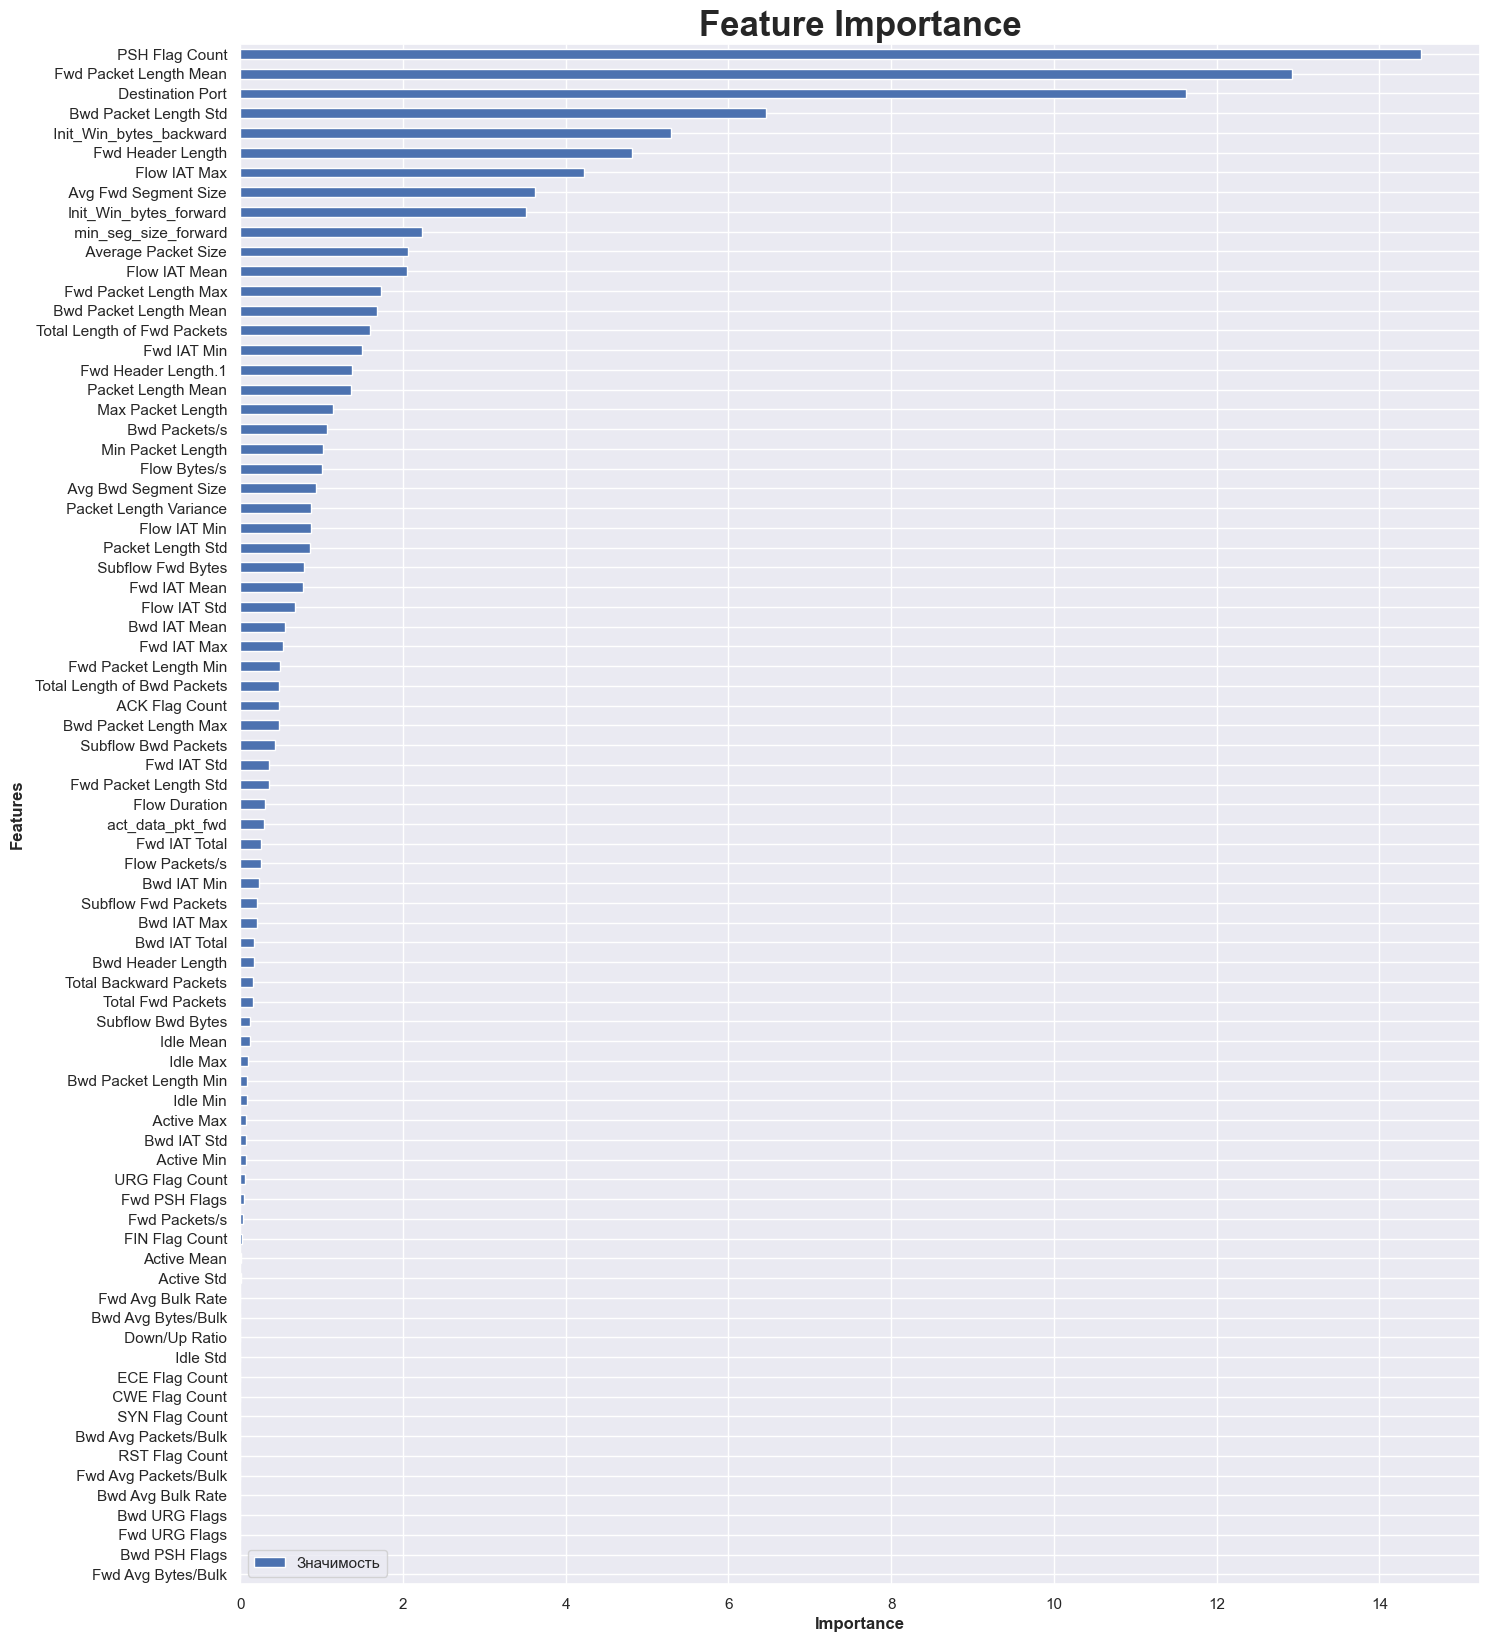

In [16]:
#график важности признаков
best_features_importance = model_cat_raw.feature_importances_

pd.DataFrame(data={
          'Поле': X0_train.columns,
          'Значимость': best_features_importance
      }
            ).set_index('Поле').sort_values(by='Значимость').plot(kind='barh',figsize = (16,20))
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.xlabel('Importance', weight = 'bold')
plt.ylabel('Features', weight = 'bold')
plt.show()

## EDA

###  Очистка данных (Data Cleaning)

In [16]:
#Скопируем датасет
df1 = data.copy()

In [17]:
# удаление дубликатов и замена бесконечности и пропусков на 0
df1 =  df1.drop_duplicates(keep="first")# Dropping the duplicates

df1 = df1.replace([np.inf, -np.inf], np.nan) #Replacing the infinite values to NaN

df1.replace(r'^\s*$', np.nan, regex=True)#converting the blank spaces into NaN values

df1=df1.replace(np.nan, 0) #Converting the NaN values to zeros

print(data.shape)
print(df1.shape)

(539616, 79)
(475015, 79)


In [18]:
#проверка
print('Количество бесконеч.значений: {:.0f}'.format(df1.isin([float('inf'), float('-inf')]).values.sum()))
print ('Количество пропусков: {:.0f}'.format(df1.isna().sum().sum()))
print('Количество дубликатов: {:.0f}'.format(df1.duplicated().sum()))

Количество бесконеч.значений: 0
Количество пропусков: 0
Количество дубликатов: 0


In [19]:
# Создание экземпляра LabelEncoder
le = LabelEncoder()
# Кодирование данных
df1['Label']= le.fit_transform(df1['Label'])
display(df1.head(5))
print(df1['Label'].unique())

Destination Port   Flow Duration   Total Fwd Packets  \
0                 80         5480074                   3   
1                443          711977                   9   
2                 53          153398                   2   
3                 53           57660                   1   
4               8446             767                   3   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                           12   
1                       10                          703   
2                        2                           80   
3                        1                           46   
4                        1                           43   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                          3950                     267   
2                           224                      40   
3                           128                      46   
4                             6                      31   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       0                    4.000                   3.465   
1                       0                   78.100                 103.300   
2                      40                   40.000                   0.000   
3                      46                   46.000                   0.000   
4                       6                   14.336                  14.440   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                     32          0.0          0.0            0   
2  ...                     20          0.0          0.0            0   
3  ...                     20          0.0          0.0            0   
4  ...                     20          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min  Label  
0            0        0.0        0.0          0          0      0  
1            0        0.0        0.0          0          0      0  
2            0        0.0        0.0          0          0      0  
3            0        0.0        0.0          0          0      0  
4            0        0.0        0.0          0          0      0  

[5 rows x 79 columns]

[ 0 10  4  2  1  9 12 14 13  7 11  6  5  3  8]


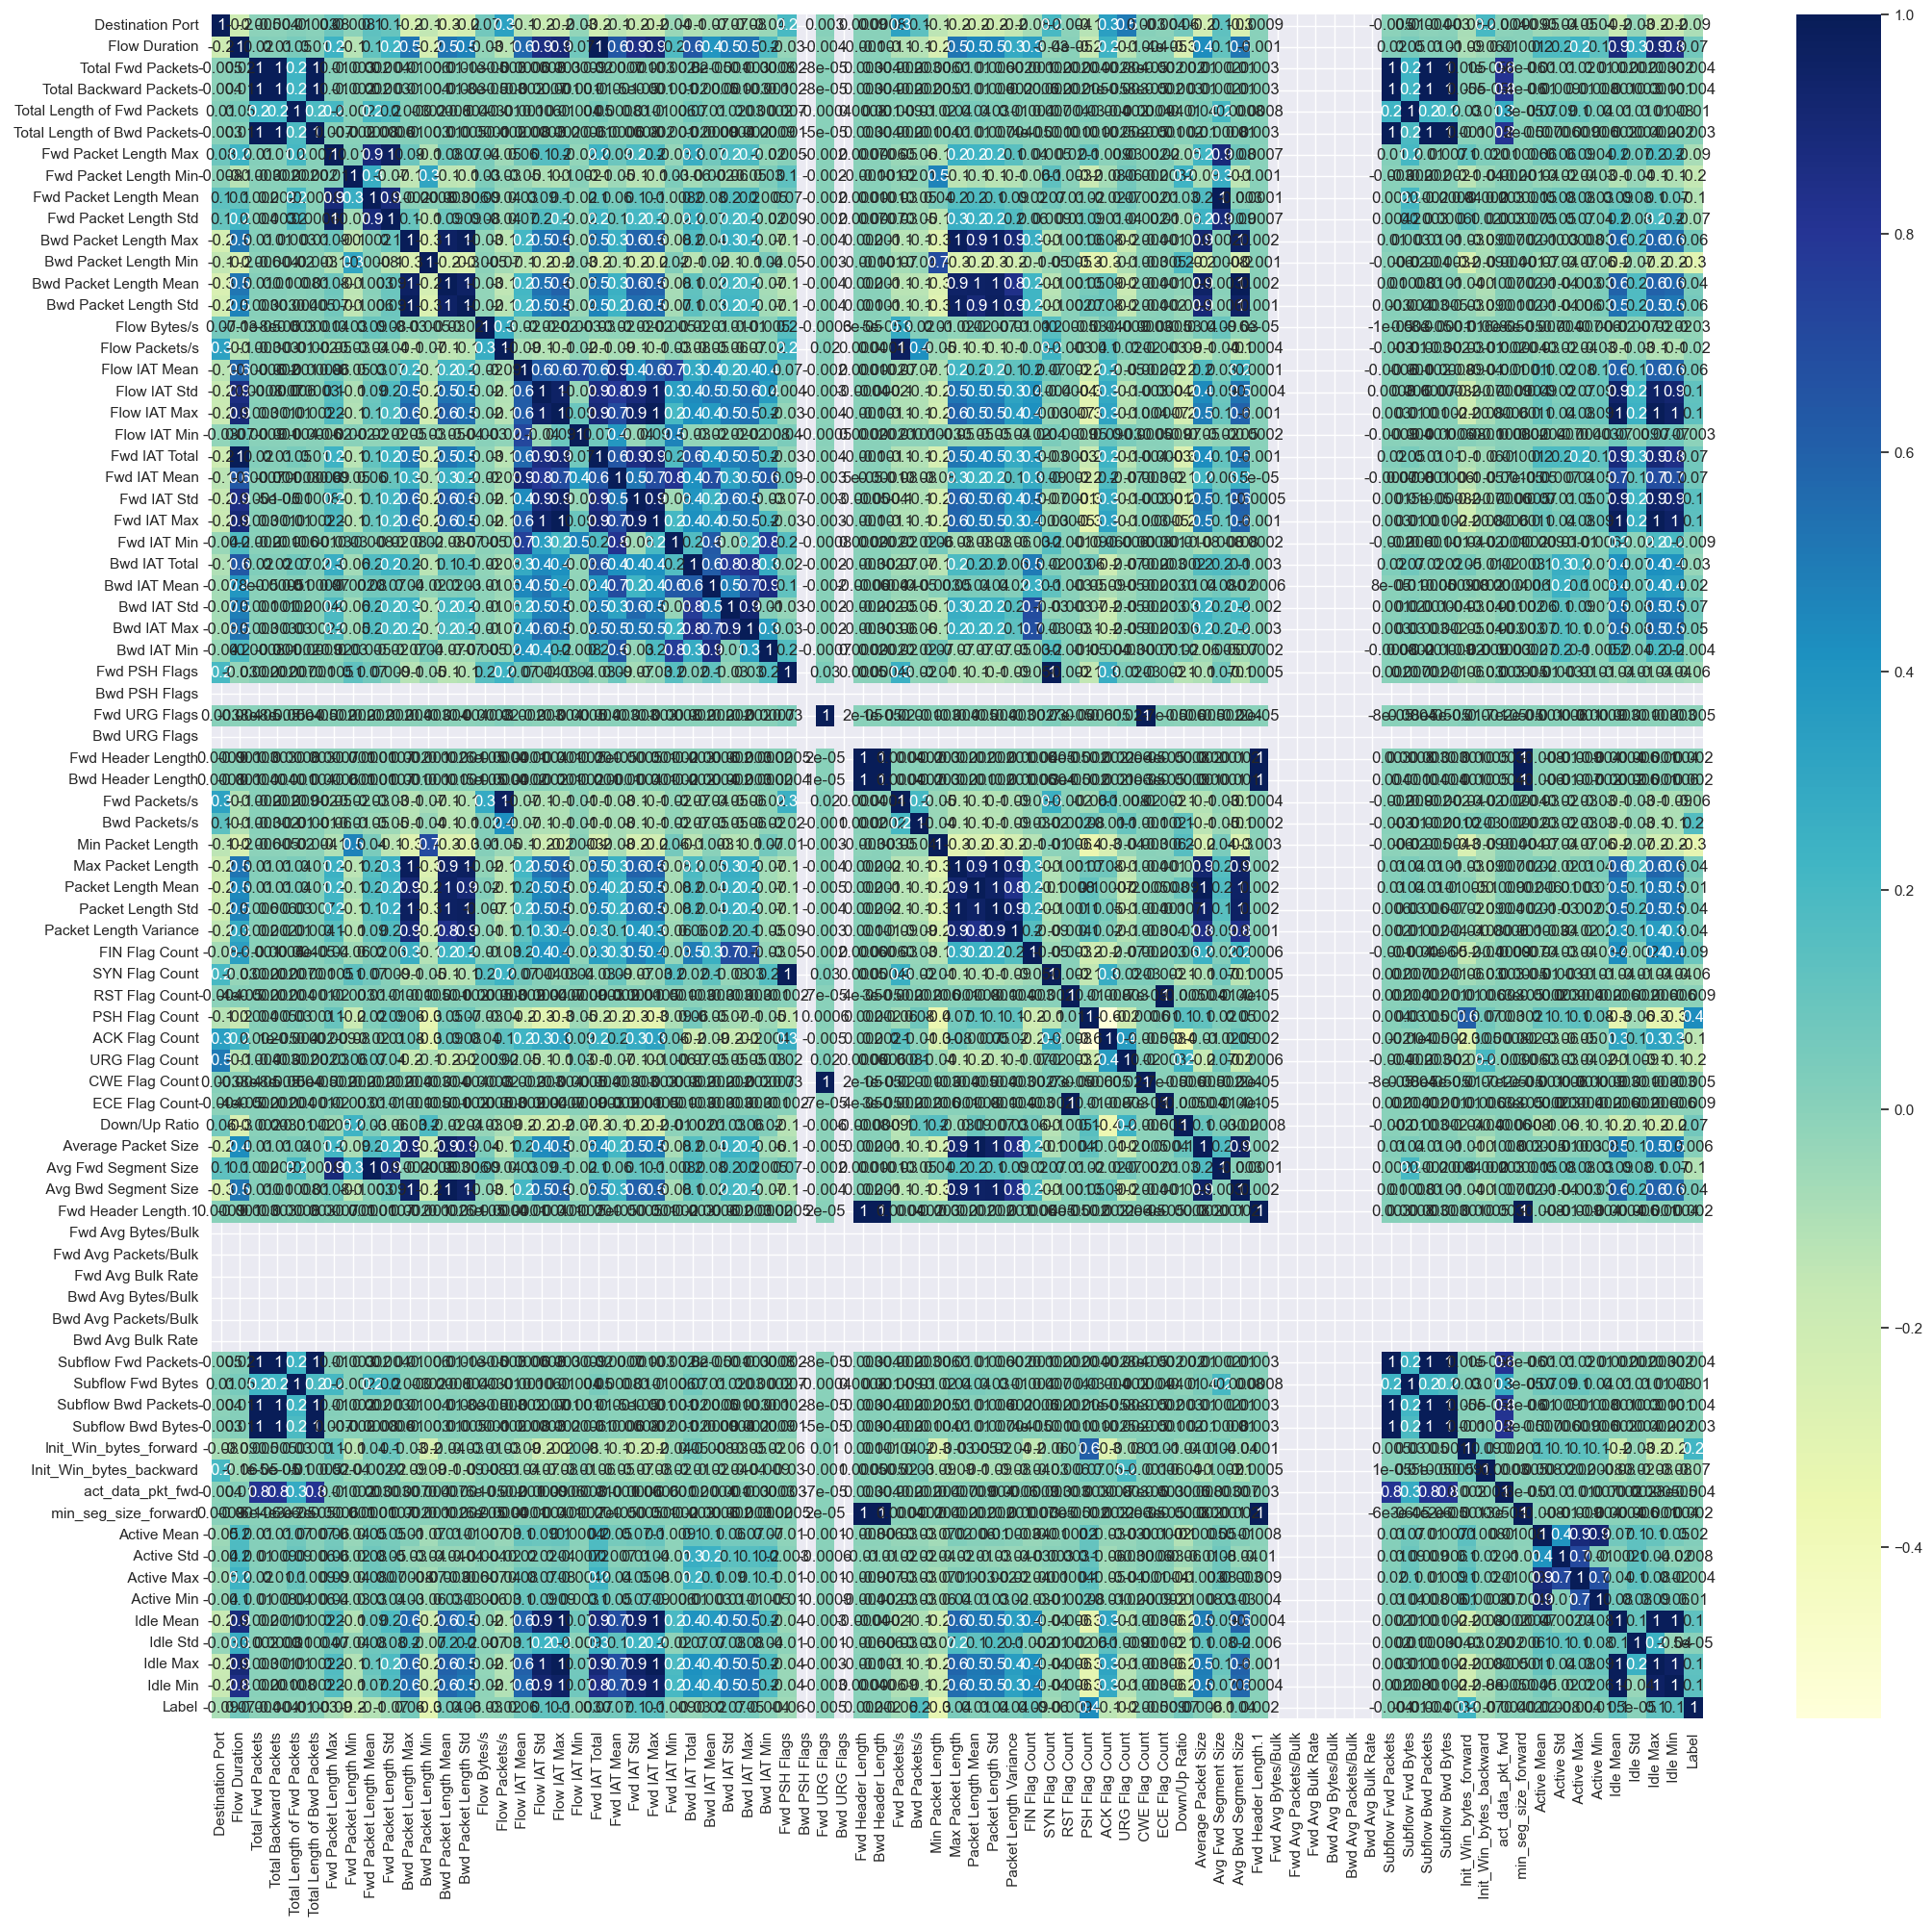

In [22]:
# Посмотрим на корреляцию признаков
corr = df1.corr()
plt.figure(figsize= (25, 23))
sns.heatmap(corr,cmap= 'YlGnBu', fmt=".1g", annot=True)
plt.show()

Не особо читабельный график получился.
На графике видно, что есть столбцы с нулевой корреляцией, Это как раз те столбцы, где значения все нулевые. Удалим их 

In [20]:
#признаки со значением 0 (имеют нулевую корреляцию)
df1_unimportance_drop = df1[[ ' Bwd PSH Flags',' Bwd URG Flags','Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk',\
                             ' Fwd Avg Bulk Rate',' Bwd Avg Bytes/Bulk','Bwd Avg Bulk Rate',' Bwd Avg Packets/Bulk']]
    


In [21]:
df1_unimportance_drop.head()

Bwd PSH Flags   Bwd URG Flags  Fwd Avg Bytes/Bulk   Fwd Avg Packets/Bulk  \
0               0               0                   0                      0   
1               0               0                   0                      0   
2               0               0                   0                      0   
3               0               0                   0                      0   
4               0               0                   0                      0   

    Fwd Avg Bulk Rate   Bwd Avg Bytes/Bulk  Bwd Avg Bulk Rate  \
0                   0                    0                  0   
1                   0                    0                  0   
2                   0                    0                  0   
3                   0                    0                  0   
4                   0                    0                  0   

    Bwd Avg Packets/Bulk  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [22]:
# Удалим признак с нулевой корреляцией
df1=df1.drop(columns=df1_unimportance_drop)


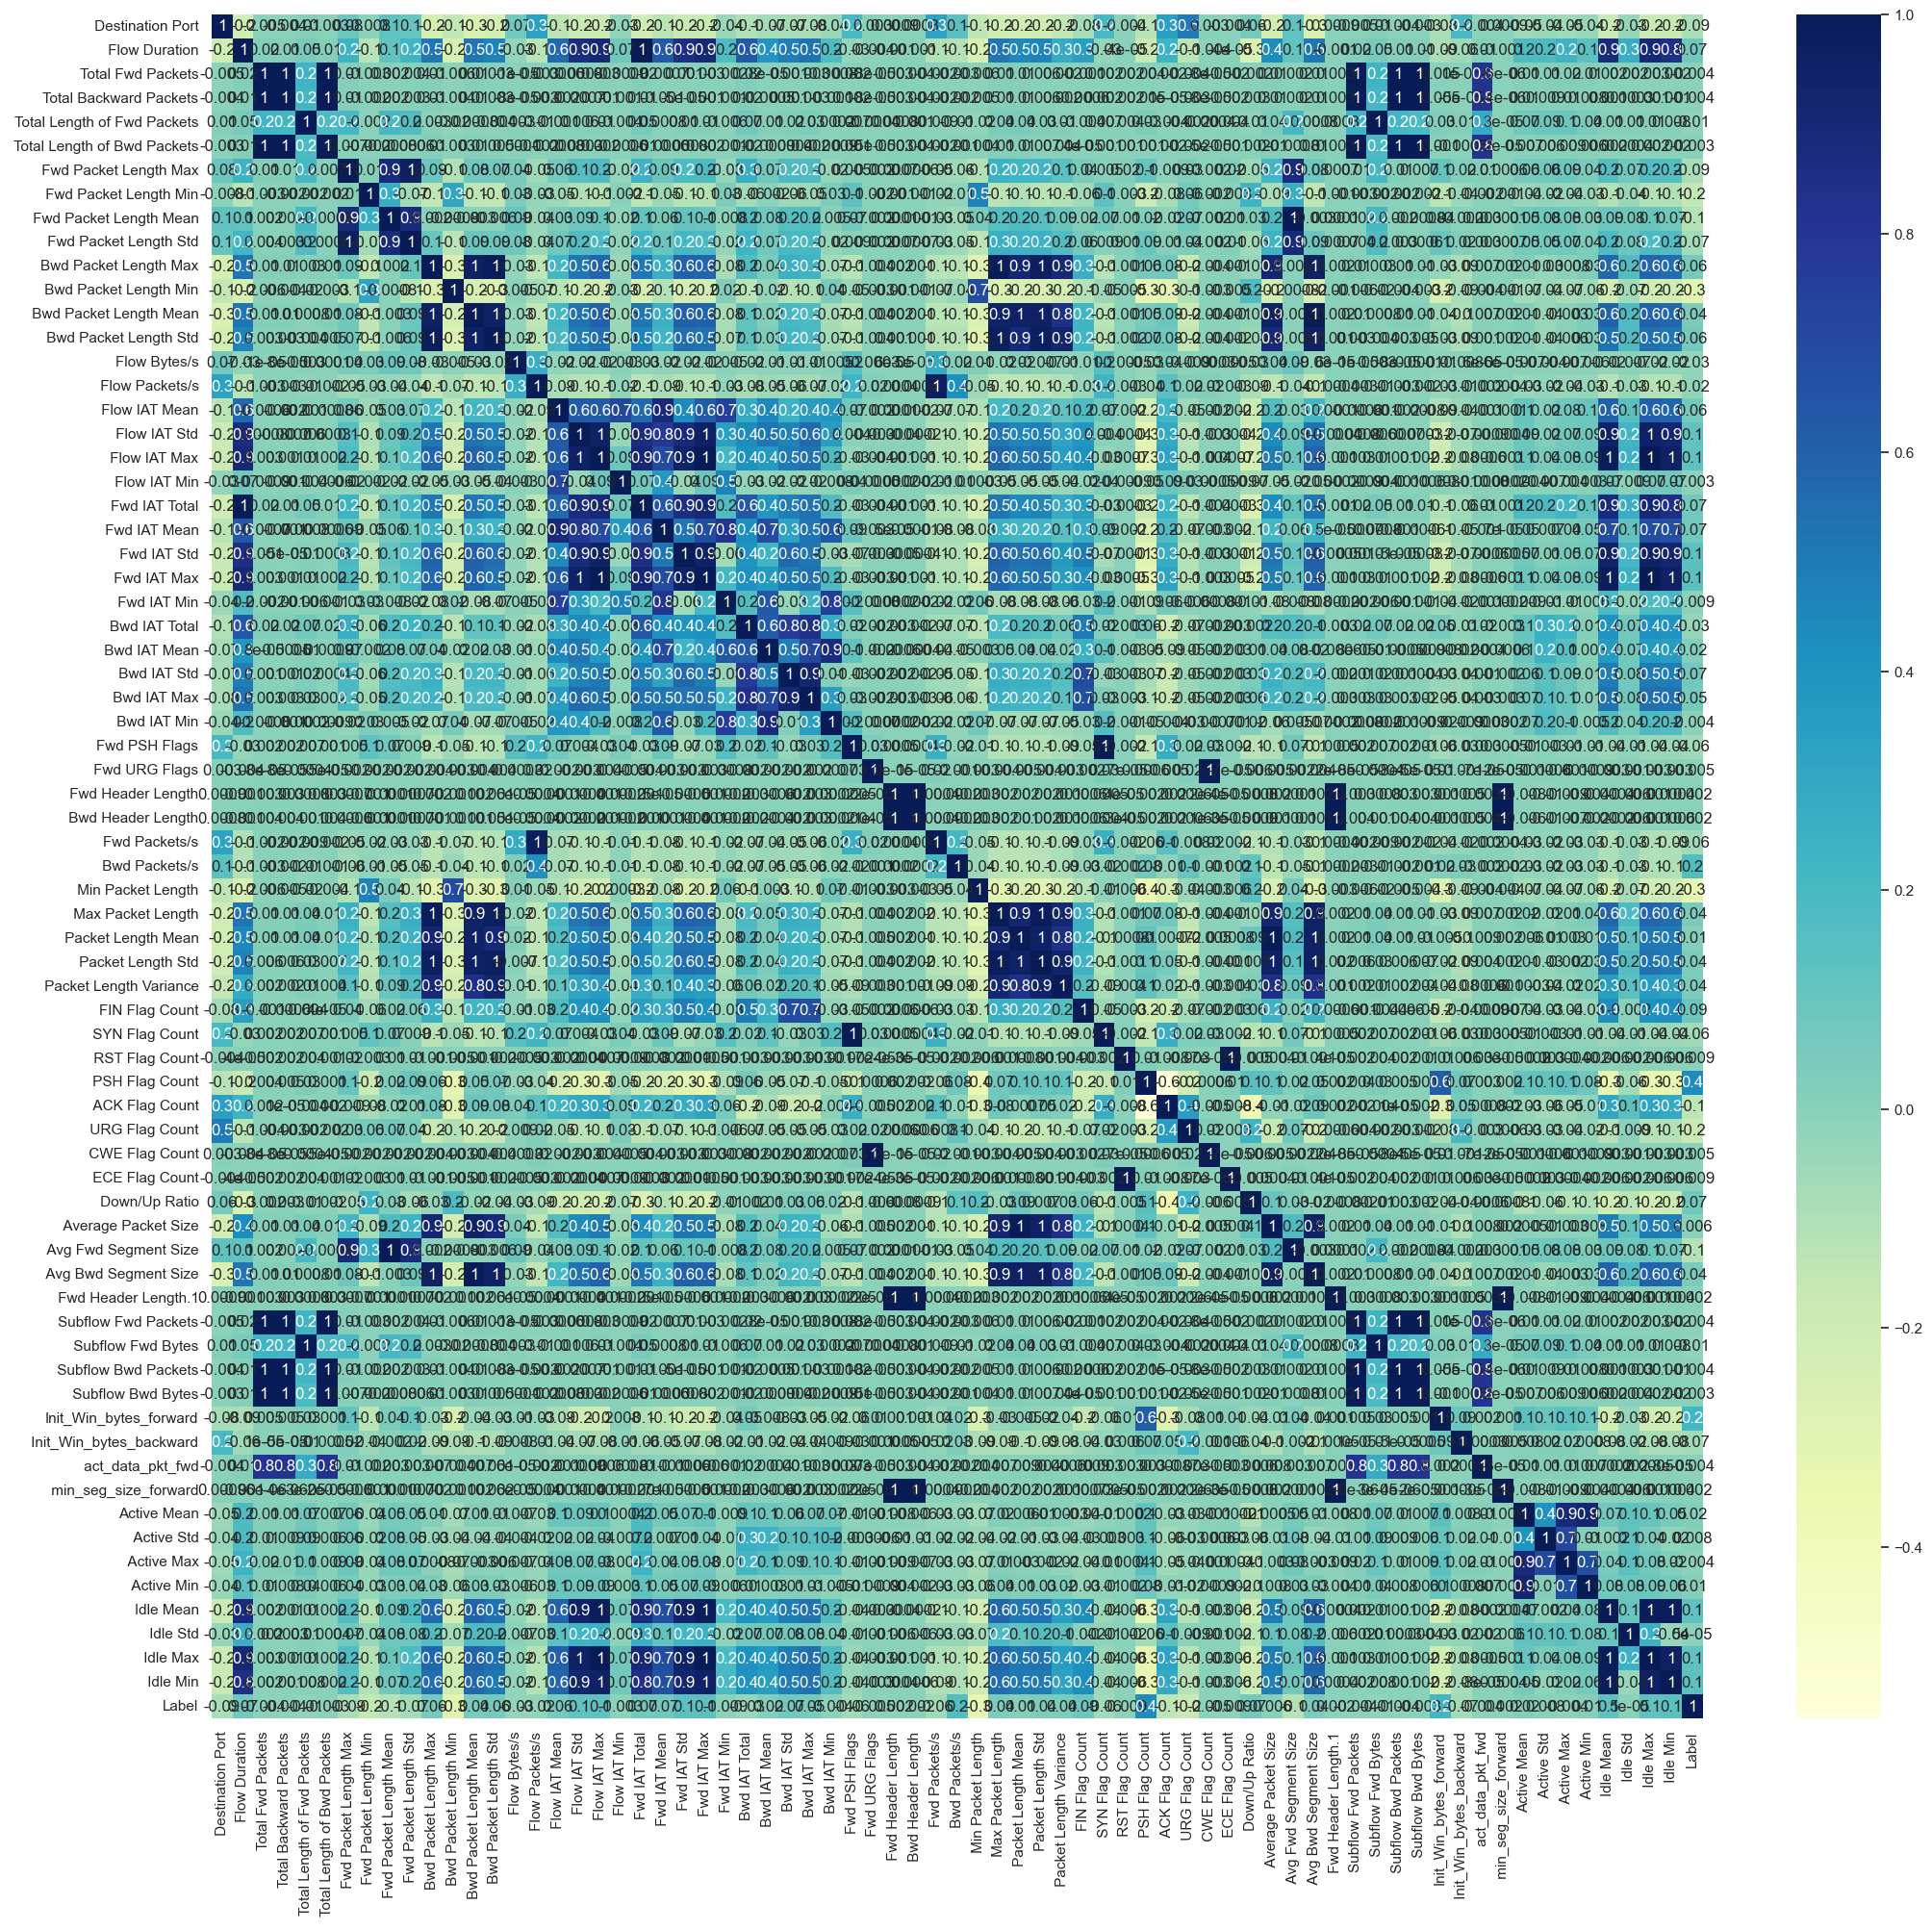

In [28]:
# Еще раз посмотрим на карту
plt.figure(figsize= (25, 23))
sns.heatmap(df1.corr(),cmap= 'YlGnBu', fmt=".1g", annot=True)
plt.show()

### Подготовка к обучению 

In [23]:
#Разделение X1 и y1 для определения важных функций для дальнейшего применения модели
y1_target = df1['Label'] 
X1_data = df1.drop(['Label'],axis=1)



In [24]:

#найдем объекты со значением корреляции, превышающей пороговое значение
def get_correlation_high(X_data,threshold): 
    corr_col=set()
    corrmat=X_data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

#признаки с высоким значением корреляции
corelated_features=get_correlation_high(X1_data,0.95) 
corelated_features


{' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd Header Length',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' min_seg_size_forward',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [25]:
corr=list(corelated_features)
#удаление коррелирующий признаков из датасета
for i in corr:  
    df1.drop(labels=[i],axis=1,inplace=True)

Окончательный набор функций после исключения тесно связанных между собой функций с показателем корреляции более 0,95.

In [26]:
#просмотр итогового датасета
print('Размер сырого датасета:',data.shape)
print('Размер финального датасета:',df1.shape)
print('Признаки оставшиеся:',df1.columns)

Размер сырого датасета: (539616, 79)
Размер финального датасета: (475015, 43)
Признаки оставшиеся: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       'Bwd Packet Length Max', ' Bwd Packet Length Min', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Min',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Fwd PSH Flags', ' Fwd URG Flags', ' Fwd Header Length',
       ' Bwd Packets/s', ' Min Packet Length', ' Packet Length Variance',
       'FIN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', 'Active Mean', ' Active Std', ' Active Max',
       ' Activ

## Моделирование

In [27]:
#разделим 
X_train, y_train, X_valid, y_valid, X_test, y_test = separation(df1)

(285009, 42)
(285009,)
(95003, 42)
(95003,)
(95003, 42)
(95003,)


In [28]:
#масштабирование данных
#числовые признаки numeric(за вычетом столбцов hascrcard, isactivemember, которые содержат только значения 0; 1)
numeric = X_train.select_dtypes(exclude='object').columns.to_list()

scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])
pd.options.mode.chained_assignment=None
#проверка
display(X_train.head(3))
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

Destination Port   Flow Duration   Total Fwd Packets  \
229978          -0.374916       -0.601218           -0.013261   
346382          -0.373175        1.922283            0.001579   
344670          -0.373175       -0.590717           -0.009021   

        Total Length of Fwd Packets   Fwd Packet Length Max  \
229978                    -0.052845               -0.226365   
346382                    -0.052974               -0.288897   
344670                    -0.056844               -0.288897   

         Fwd Packet Length Min   Fwd Packet Length Mean  \
229978                0.899096                 0.049677   
346382               -0.245325                -0.275518   
344670               -0.245325                -0.264696   

        Bwd Packet Length Max   Bwd Packet Length Min  Flow Bytes/s  ...  \
229978              -0.618637                0.804144     -0.041615  ...   
346382               1.327216               -0.449720     -0.041864  ...   
344670               0.341974               -0.449720     -0.040665  ...   

         URG Flag Count   Down/Up Ratio  Init_Win_bytes_forward  \
229978         -0.25626        0.514188               -0.570173   
346382         -0.25626       -1.037425               -0.551357   
344670         -0.25626        2.065802                0.029673   

         Init_Win_bytes_backward   act_data_pkt_fwd  Active Mean   Active Std  \
229978                 -0.205990          -0.009903    -0.156089    -0.098222   
346382                 -0.173017           0.006527     0.235055    -0.098222   
344670                 -0.173017          -0.004426    -0.156089    -0.098222   

         Active Max   Active Min   Idle Std  
229978    -0.167871    -0.133369  -0.158863  
346382     0.124232     0.294408  -0.158863  
344670    -0.167871    -0.133369  -0.158863  

[3 rows x 42 columns]

(285009, 42)
(95003, 42)
(95003, 42)


### Catboost

In [30]:
CBoost_model = CatBoostClassifier(iterations=350, learning_rate=0.05, random_seed=42,
                                  metric_period=10)

CBoost_model.fit(X_train, y_train)

0:	learn: 2.1204074	total: 523ms	remaining: 3m 2s
10:	learn: 0.8516123	total: 4.51s	remaining: 2m 19s
20:	learn: 0.4917555	total: 9.2s	remaining: 2m 24s
30:	learn: 0.3153885	total: 13.2s	remaining: 2m 15s
40:	learn: 0.2151861	total: 17.7s	remaining: 2m 13s
50:	learn: 0.1553640	total: 21.9s	remaining: 2m 8s
60:	learn: 0.1161972	total: 26.3s	remaining: 2m 4s
70:	learn: 0.0903013	total: 31.2s	remaining: 2m 2s
80:	learn: 0.0722768	total: 35.8s	remaining: 1m 58s
90:	learn: 0.0605299	total: 39.1s	remaining: 1m 51s
100:	learn: 0.0524760	total: 42.9s	remaining: 1m 45s
110:	learn: 0.0466625	total: 47.1s	remaining: 1m 41s
120:	learn: 0.0415043	total: 50.3s	remaining: 1m 35s
130:	learn: 0.0368528	total: 53.3s	remaining: 1m 29s
140:	learn: 0.0335479	total: 57.3s	remaining: 1m 24s
150:	learn: 0.0308854	total: 1m 1s	remaining: 1m 20s
160:	learn: 0.0286767	total: 1m 5s	remaining: 1m 16s
170:	learn: 0.0264067	total: 1m 9s	remaining: 1m 12s
180:	learn: 0.0249313	total: 1m 12s	remaining: 1m 7s
190:	lear

In [32]:
# Получим предсказания на валид выборке
CBoost_pred = CBoost_model.predict(X_valid)
CBoost_acc = accuracy_score(y_valid,CBoost_pred)
print('the accuracy of CatBoost model',CBoost_acc)

the accuracy of CatBoost model 0.9964737955643506


In [33]:
print(classification_report(y_valid, CBoost_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46562
           1       0.93      0.94      0.93       390
           2       1.00      1.00      1.00     12873
           3       0.99      1.00      1.00      2057
           4       1.00      1.00      1.00     17450
           5       0.99      0.99      0.99      1045
           6       0.99      0.98      0.99      1077
           7       1.00      1.00      1.00      1187
           8       1.00      0.50      0.67         2
           9       1.00      0.29      0.44         7
          10       1.00      1.00      1.00     11280
          11       1.00      1.00      1.00       644
          12       0.70      1.00      0.82       294
          13       0.00      0.00      0.00         4
          14       1.00      0.02      0.04       131

    accuracy                           1.00     95003
   macro avg       0.91      0.78      0.79     95003
weighted avg       1.00   

/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

### RandomForest с подбором гиперпараметров

In [34]:
%%time
#random_state не перебирается, задаём его прямо в модели
model_forest = RandomForestClassifier(random_state=42, class_weight='balanced')
#словарь с гиперпараметрами и значениями, которые хотим перебрать

parameters_forest = {'n_estimators': range(5, 251, 50),
                    'max_features': ['log2', 'sqrt'],
                    'max_depth': range(2, 20),
                    'min_samples_split': (2, 3, 4),
                    'min_samples_leaf': (2, 3, 4, 5, 6)}


#получается достаточно много комбинаций гиперпараметров при переборе
#будем использовать RandomizedSearchCV, он работает на много быстрее
gs_forest = RandomizedSearchCV(model_forest, param_distributions=parameters_forest, cv=5, scoring='accuracy', n_jobs=-1)

gs_forest.fit(X_train, y_train)

accuracy_forest = gs_forest.best_score_
best_params_forest = gs_forest.best_params_
best_model_forest = gs_forest.best_estimator_

# лучшее значение accuracy на кросс-валидации
print(f'Accuracy best_score: {accuracy_forest}')
# лучшие гиперпараметры
print(f'best_params: {best_params_forest}')
print(f'best_model: {gs_forest.best_estimator_}')

Accuracy best_score: 0.9945370143987269
best_params: {'n_estimators': 205, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 19}
best_model: RandomForestClassifier(class_weight='balanced', max_depth=19,
                       min_samples_leaf=5, n_estimators=205, random_state=42)
CPU times: user 1min 49s, sys: 1.72 s, total: 1min 51s
Wall time: 9min 31s


In [36]:
%%time
Best_Forest = RandomForestClassifier(class_weight='balanced', max_depth=17,
                       max_features='log2', min_samples_leaf=6,
                       min_samples_split=3, n_estimators=155, random_state=42)
Best_Forest.fit(X_train, y_train)
Forest_pred=Best_Forest.predict(X_valid)
forest_acc = accuracy_score(y_valid,Forest_pred)
print('the accuracy',forest_acc)

the accuracy 0.9930949548961612
CPU times: user 1min 3s, sys: 633 ms, total: 1min 3s
Wall time: 1min 4s


In [37]:
print(classification_report(y_valid, Forest_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     46562
           1       0.59      0.99      0.74       390
           2       1.00      1.00      1.00     12873
           3       0.99      1.00      0.99      2057
           4       1.00      1.00      1.00     17450
           5       0.99      0.99      0.99      1045
           6       1.00      0.99      0.99      1077
           7       1.00      1.00      1.00      1187
           8       1.00      0.50      0.67         2
           9       1.00      0.57      0.73         7
          10       1.00      1.00      1.00     11280
          11       1.00      1.00      1.00       644
          12       0.82      0.60      0.69       294
          13       0.67      1.00      0.80         4
          14       0.37      0.78      0.50       131

    accuracy                           0.99     95003
   macro avg       0.89      0.89      0.87     95003
weighted avg       1.00   

### RandomForest

In [29]:
%%time
RF_model = RandomForestClassifier(n_estimators=350,random_state=42,class_weight='balanced')
RF_model.fit(X_train, y_train)
RF_pred=RF_model.predict(X_valid)
RF_acc = accuracy_score(y_valid,RF_pred)
print('the accuracy of RF model',RF_acc)

the accuracy of RF model 0.9970737766175805
CPU times: user 3min 26s, sys: 2.29 s, total: 3min 28s
Wall time: 3min 31s


In [30]:
print(classification_report(y_valid, RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46562
           1       0.94      0.96      0.95       390
           2       1.00      1.00      1.00     12873
           3       1.00      1.00      1.00      2057
           4       1.00      1.00      1.00     17450
           5       0.99      0.99      0.99      1045
           6       1.00      0.99      0.99      1077
           7       1.00      1.00      1.00      1187
           8       1.00      0.50      0.67         2
           9       1.00      0.43      0.60         7
          10       1.00      1.00      1.00     11280
          11       1.00      1.00      1.00       644
          12       0.77      0.75      0.76       294
          13       1.00      0.75      0.86         4
          14       0.49      0.52      0.50       131

    accuracy                           1.00     95003
   macro avg       0.95      0.86      0.89     95003
weighted avg       1.00   

### LogisticRegression

In [40]:
%%time
LR_model = LogisticRegression(random_state=42,class_weight='balanced')
LR_model.fit(X_train, y_train)
LR_pred=LR_model.predict(X_valid)
LR_acc = accuracy_score(y_valid,RF_pred)
print('the accuracy of RF model',LR_acc)

the accuracy of RF model 0.9970737766175805
CPU times: user 1min 3s, sys: 1.78 s, total: 1min 4s
Wall time: 11.1 s


/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
print(classification_report(y_valid, LR_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83     46562
           1       0.08      0.74      0.14       390
           2       0.99      0.99      0.99     12873
           3       0.74      0.95      0.83      2057
           4       0.94      0.99      0.96     17450
           5       0.54      0.96      0.69      1045
           6       0.68      0.93      0.79      1077
           7       0.69      1.00      0.82      1187
           8       1.00      1.00      1.00         2
           9       0.00      0.86      0.01         7
          10       0.93      0.99      0.96     11280
          11       0.37      0.93      0.53       644
          12       0.28      0.47      0.35       294
          13       0.00      1.00      0.00         4
          14       0.07      0.83      0.14       131

    accuracy                           0.85     95003
   macro avg       0.55      0.89      0.60     95003
weighted avg       0.95   

### DecisionTree

In [29]:
%%time
from sklearn.tree import DecisionTreeClassifier 
#from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1,5,10,50],'min_samples_split':[5,10,100,500]}
DTclf= GridSearchCV(DecisionTreeClassifier(),parameters)
DTclf.fit(X_train, y_train)

print('Best score: ',DTclf.best_score_)
print('Parameters with best score: ',DTclf.best_params_)

Best score:  0.9960913525966522
Parameters with best score:  {'max_depth': 50, 'min_samples_split': 5}
CPU times: user 3min 9s, sys: 10.1 s, total: 3min 20s
Wall time: 3min 24s


In [30]:
Best_DT_clf = DecisionTreeClassifier(max_depth=50, min_samples_split=5, random_state=42)
Best_DT_clf.fit(X_train, y_train)
H_DT_pred=Best_DT_clf.predict(X_valid)
H_DT_acc = accuracy_score(y_valid,H_DT_pred)
print('the accuracy',H_DT_acc)

the accuracy 0.9962422239297707


In [31]:
print(classification_report(y_valid, H_DT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46562
           1       0.93      0.94      0.93       390
           2       1.00      1.00      1.00     12873
           3       0.99      1.00      0.99      2057
           4       1.00      1.00      1.00     17450
           5       0.99      0.99      0.99      1045
           6       0.99      0.99      0.99      1077
           7       1.00      1.00      1.00      1187
           8       1.00      0.50      0.67         2
           9       1.00      0.86      0.92         7
          10       1.00      1.00      1.00     11280
          11       1.00      1.00      1.00       644
          12       0.72      0.75      0.73       294
          13       0.75      0.75      0.75         4
          14       0.38      0.36      0.37       131

    accuracy                           1.00     95003
   macro avg       0.92      0.87      0.89     95003
weighted avg       1.00   

### LGBM

In [ ]:
#%%time
#lgbm_model = LGBMClassifier(random_state=42,
#                            n_estimators = 100, n_jobs=-1 , learning_rate = 0.1)


#lgbm_model.fit(X_train, y_train)
#lgbm_pred = model.predict(X_valid)
#lgbm_acc = accuracy_score(y_valid,lgbm_pred)
#print('the accuracy of LGBM model',lgbm_acc)


## Анализ моделей


In [46]:
#оформление итогов в виде таблицы

print('\033[1m' + '\nСравнение accuracy на разных моделях ' + '\033[0m')

df_total = {'Accuracy':[cat_row_acc, CBoost_acc, forest_acc,RF_acc, LR_acc, H_DT_acc, ' '] }


#pd.set_option('display.float_format', '{:.2f}'.format)
table__total = pd.DataFrame(df_total)

table__total.index = ['biseline(catboost)','CatBoostClassifier','RandomForest(GridSearch)','RandomForestClassifier',
                      'LogisticRegression',
                      'DesicionTree', 'LGBM']

display(table__total)


Сравнение accuracy на разных моделях 


Accuracy
biseline(catboost)        0.995969
CatBoostClassifier        0.996474
RandomForest(GridSearch)  0.993095
RandomForestClassifier    0.997074
LogisticRegression        0.997074
DesicionTree              0.996242
LGBM

## EDA (2 вариант)

Попробуем другой вариант анализа: удалим дубликаты, замени пропуски и бесконечности на ), удалим строк, где все значения 0 ( то есто, все тоже самое, только не будем удалять признаки с высокой корреляций), и не будем делать масштабирование

###  Очистка данных (Data Cleaning)

In [58]:
#Скопируем датасет
df2 = data.copy()

In [59]:
# удаление дубликатов и замена бесконечности и пропусков на 0
df2 =  df2.drop_duplicates(keep="first")# Dropping the duplicates

df2 = df2.replace([np.inf, -np.inf], np.nan) #Replacing the infinite values to NaN

df2.replace(r'^\s*$', np.nan, regex=True)#converting the blank spaces into NaN values

df2=df2.replace(np.nan, 0) #Converting the NaN values to zeros

print(data.shape)
print(df2.shape)

(539616, 79)
(475015, 79)


In [60]:
#проверка
print('Количество бесконеч.значений: {:.0f}'.format(df2.isin([float('inf'), float('-inf')]).values.sum()))
print ('Количество пропусков: {:.0f}'.format(df2.isna().sum().sum()))
print('Количество дубликатов: {:.0f}'.format(df2.duplicated().sum()))

Количество бесконеч.значений: 0
Количество пропусков: 0
Количество дубликатов: 0


In [61]:
# Создание экземпляра LabelEncoder
le2 = LabelEncoder()
# Кодирование данных
df2['Label']= le2.fit_transform(df2['Label'])
display(df2.head(5))
print(df2['Label'].unique())

Destination Port   Flow Duration   Total Fwd Packets  \
0                 80         5480074                   3   
1                443          711977                   9   
2                 53          153398                   2   
3                 53           57660                   1   
4               8446             767                   3   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                           12   
1                       10                          703   
2                        2                           80   
3                        1                           46   
4                        1                           43   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                          3950                     267   
2                           224                      40   
3                           128                      46   
4                             6                      31   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       0                    4.000                   3.465   
1                       0                   78.100                 103.300   
2                      40                   40.000                   0.000   
3                      46                   46.000                   0.000   
4                       6                   14.336                  14.440   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                     32          0.0          0.0            0   
2  ...                     20          0.0          0.0            0   
3  ...                     20          0.0          0.0            0   
4  ...                     20          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min  Label  
0            0        0.0        0.0          0          0      0  
1            0        0.0        0.0          0          0      0  
2            0        0.0        0.0          0          0      0  
3            0        0.0        0.0          0          0      0  
4            0        0.0        0.0          0          0      0  

[5 rows x 79 columns]

[ 0 10  4  2  1  9 12 14 13  7 11  6  5  3  8]


In [62]:
# Удалим признак с нулевой корреляцией
df2=df2.drop(columns=df1_unimportance_drop)


In [64]:
#просмотр итогового датасета
print('Размер сырого датасета:',data.shape)
print('Размер финального датасета(1 вар):',df1.shape)
print('Размер финального датасета(2 вар):',df2.shape)

Размер сырого датасета: (539616, 79)
Размер финального датасета(1 вар): (475015, 43)
Размер финального датасета(2 вар): (475015, 71)


## Моделирование( 2 вариант)

In [65]:
#разделим 
X2_train, y2_train, X2_valid, y2_valid, X2_test, y2_test = separation(df2)

(285009, 70)
(285009,)
(95003, 70)
(95003,)
(95003, 70)
(95003,)


### Catboost

In [67]:
CBoost_model2 = CatBoostClassifier(iterations=350, learning_rate=0.05, random_seed=42,
                                  metric_period=10)

CBoost_model2.fit(X2_train, y2_train)

0:	learn: 2.1153663	total: 485ms	remaining: 2m 49s
10:	learn: 0.8375824	total: 5.28s	remaining: 2m 42s
20:	learn: 0.4800878	total: 9.78s	remaining: 2m 33s
30:	learn: 0.3048877	total: 14.8s	remaining: 2m 32s
40:	learn: 0.2082110	total: 19.5s	remaining: 2m 26s
50:	learn: 0.1494479	total: 24.2s	remaining: 2m 21s
60:	learn: 0.1121036	total: 29.2s	remaining: 2m 18s
70:	learn: 0.0860516	total: 34.4s	remaining: 2m 15s
80:	learn: 0.0690492	total: 39.3s	remaining: 2m 10s
90:	learn: 0.0586303	total: 44.2s	remaining: 2m 5s
100:	learn: 0.0517345	total: 49.5s	remaining: 2m 1s
110:	learn: 0.0453085	total: 54.6s	remaining: 1m 57s
120:	learn: 0.0401234	total: 59.8s	remaining: 1m 53s
130:	learn: 0.0353826	total: 1m 4s	remaining: 1m 48s
140:	learn: 0.0321960	total: 1m 10s	remaining: 1m 43s
150:	learn: 0.0296823	total: 1m 15s	remaining: 1m 39s
160:	learn: 0.0275920	total: 1m 20s	remaining: 1m 34s
170:	learn: 0.0257776	total: 1m 25s	remaining: 1m 29s
180:	learn: 0.0240736	total: 1m 30s	remaining: 1m 24s
1

In [70]:
# Получим предсказания на валид выборке
CBoost_pred2 = CBoost_model2.predict(X2_valid)
CBoost_acc2 = accuracy_score(y_valid,CBoost_pred2)
print('the accuracy of CatBoost model',CBoost_acc2)

the accuracy of CatBoost model 0.9965580034314706


In [72]:
print(classification_report(y2_valid, CBoost_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46562
           1       0.93      0.94      0.93       390
           2       1.00      1.00      1.00     12873
           3       1.00      1.00      1.00      2057
           4       1.00      1.00      1.00     17450
           5       0.99      0.99      0.99      1045
           6       1.00      0.99      0.99      1077
           7       1.00      1.00      1.00      1187
           8       1.00      0.50      0.67         2
           9       1.00      0.29      0.44         7
          10       1.00      1.00      1.00     11280
          11       1.00      1.00      1.00       644
          12       0.70      0.99      0.82       294
          13       0.00      0.00      0.00         4
          14       1.00      0.02      0.04       131

    accuracy                           1.00     95003
   macro avg       0.91      0.78      0.79     95003
weighted avg       1.00   

/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

### RandomForest

In [74]:
%%time
RF_model2 = RandomForestClassifier(n_estimators=350,random_state=42,class_weight='balanced')
RF_model2.fit(X2_train, y2_train)
RF_pred2 =RF_model2.predict(X2_valid)
RF_acc2 = accuracy_score(y2_valid,RF_pred2)
print('the accuracy of RF model',RF_acc2)

the accuracy of RF model 0.9966211593318106
CPU times: user 3min 38s, sys: 1.76 s, total: 3min 40s
Wall time: 3min 41s


In [75]:
print(classification_report(y2_valid, RF_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46562
           1       0.94      0.94      0.94       390
           2       1.00      1.00      1.00     12873
           3       1.00      1.00      1.00      2057
           4       1.00      1.00      1.00     17450
           5       0.99      0.99      0.99      1045
           6       1.00      0.99      0.99      1077
           7       1.00      1.00      1.00      1187
           8       1.00      0.50      0.67         2
           9       1.00      0.86      0.92         7
          10       1.00      1.00      1.00     11280
          11       1.00      1.00      1.00       644
          12       0.74      0.84      0.78       294
          13       1.00      0.50      0.67         4
          14       0.48      0.33      0.39       131

    accuracy                           1.00     95003
   macro avg       0.94      0.86      0.89     95003
weighted avg       1.00   

### LogisticRegression

In [77]:
%%time
LR_model2 = LogisticRegression(random_state=42,class_weight='balanced')
LR_model2.fit(X2_train, y2_train)
LR_pred2=LR_model2.predict(X2_valid)
LR_acc2 = accuracy_score(y2_valid,RF_pred2)
print('the accuracy of RF model',LR_acc2)

the accuracy of RF model 0.9966211593318106
CPU times: user 1min 2s, sys: 2 s, total: 1min 4s
Wall time: 11.2 s


/Users/olgafomina/opt/anaconda3/envs/project_ddos/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
print(classification_report(y2_valid, LR_pred2))

              precision    recall  f1-score   support

           0       0.59      0.37      0.45     46562
           1       0.09      0.25      0.14       390
           2       0.69      0.80      0.74     12873
           3       0.20      0.88      0.32      2057
           4       0.93      0.78      0.85     17450
           5       0.30      0.74      0.43      1045
           6       0.21      0.58      0.31      1077
           7       0.44      0.69      0.54      1187
           8       0.08      1.00      0.15         2
           9       0.01      0.86      0.01         7
          10       0.01      0.00      0.00     11280
          11       0.90      0.92      0.91       644
          12       0.00      0.00      0.00       294
          13       0.00      0.50      0.00         4
          14       0.02      0.94      0.04       131

    accuracy                           0.48     95003
   macro avg       0.30      0.62      0.33     95003
weighted avg       0.57   

### DecisionTree

In [81]:
Best_DT_clf2 = DecisionTreeClassifier(max_depth=50, min_samples_split=5, random_state=42)
Best_DT_clf2.fit(X2_train, y2_train)
H_DT_pred2 = Best_DT_clf2.predict(X2_valid)
H_DT_acc2 = accuracy_score(y2_valid,H_DT_pred2)
print('the accuracy',H_DT_acc2)

the accuracy 0.9962422239297707


In [82]:
print(classification_report(y2_valid, H_DT_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46562
           1       0.94      0.92      0.93       390
           2       1.00      1.00      1.00     12873
           3       1.00      1.00      1.00      2057
           4       1.00      1.00      1.00     17450
           5       0.99      0.98      0.99      1045
           6       0.99      0.99      0.99      1077
           7       1.00      1.00      1.00      1187
           8       1.00      0.50      0.67         2
           9       0.75      0.86      0.80         7
          10       1.00      1.00      1.00     11280
          11       1.00      1.00      1.00       644
          12       0.72      0.73      0.73       294
          13       0.75      0.75      0.75         4
          14       0.38      0.37      0.38       131

    accuracy                           1.00     95003
   macro avg       0.90      0.87      0.88     95003
weighted avg       1.00   

## Анализ моделей

In [84]:
#оформление итогов в виде таблицы

print('\033[1m' + '\nСравнение accuracy на разных моделях ' + '\033[0m')

df_total = {'Accuracy(1 вар)':[cat_row_acc, CBoost_acc, forest_acc,RF_acc, LR_acc, H_DT_acc,  ' '],
           'Accuracy(2 вар)':[' ', CBoost_acc2, ' ',RF_acc2, LR_acc2, H_DT_acc2,  ' ']}


#pd.set_option('display.float_format', '{:.2f}'.format)
table__total = pd.DataFrame(df_total)

table__total.index = ['biseline(catboost)','CatBoostClassifier','RandomForest(GridSearch)','RandomForestClassifier',
                      'LogisticRegression',
                      'DesicionTree', 'LGBM']

display(table__total)


Сравнение accuracy на разных моделях 


Accuracy(1 вар) Accuracy(2 вар)
biseline(catboost)              0.995969                
CatBoostClassifier              0.996474        0.996558
RandomForest(GridSearch)        0.993095                
RandomForestClassifier          0.997074        0.996621
LogisticRegression              0.997074        0.996621
DesicionTree                    0.996242        0.996242
LGBM

Лучше всего показала себя модель RandomForestClassifier на очищенных данных.Значение accuracy 0.997074. Запустим на тестовой 

## Проверка модели на тестовой выборке

In [31]:
%%time

RF_pred_test=RF_model.predict(X_test)
RF_acc_test = accuracy_score(y_test,RF_pred_test)
print('the accuracy of RF model on test',RF_acc_test)

the accuracy of RF model on test 0.9970106207172406
CPU times: user 4.98 s, sys: 355 ms, total: 5.33 s
Wall time: 5.38 s


## Вывод:

In [ ]:
**В ходе  подготовки данных обнаружено:** 
    - Данные содержат 79 признаков 
    - 64601 дубликатов
    - присутствуют бесконечные значения ( )
    

In [ ]:
64601 дубликатов;
Flow Bytes/s, Flow Packets/s содержат бесконечные значения (246/734)
Flow Bytes/s содержит пустые значения (488 строк)
Bwd PSH Flags,Bwd URG Flags, Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk, Bwd Avg Bytes/Bulk, Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate - все значения во всех данных равны 0
Таргет Label имеет 15 значений( тип данных object)
данные имеют очень большой разброс

In [32]:
#сохранение обученной модели в файл (для докера)
import joblib
joblib.dump(RF_model,'net_traffic_model.joblibdump')

['net_traffic_model.joblibdump']

In [2]:
#проверка окружения
import sys
sys.executable

'/Users/olgafomina/opt/anaconda3/envs/project_ddos/bin/python'

In [33]:
#проверка работоспособности загруженного файла (для докера)
loaded_model = joblib.load('net_traffic_model.joblibdump')
sa = loaded_model.predict(X_test)
ffds = accuracy_score(y_test,sa)
print('the accuracy test',ffds)

the accuracy test 0.9970106207172406


In [57]:
display(X_test[1:4])

Destination Port   Flow Duration   Total Fwd Packets  \
50918            3.846609       -0.592237           -0.011141   
306548          -0.373175       -0.573349           -0.009021   
16153           -0.373175        2.312471            0.018540   

        Total Length of Fwd Packets   Fwd Packet Length Max  \
50918                     -0.060199               -0.322699   
306548                    -0.056844               -0.288897   
16153                      0.006240                0.405720   

         Fwd Packet Length Min   Fwd Packet Length Mean  \
50918                -0.245325                -0.321045   
306548               -0.245325                -0.264696   
16153                -0.245325                -0.111620   

        Bwd Packet Length Max   Bwd Packet Length Min  Flow Bytes/s  ...  \
50918               -0.641244               -0.346662     -0.041867  ...   
306548               3.269021               -0.449720     -0.041400  ...   
16153                0.019071               -0.449720     -0.041868  ...   

         URG Flag Count   Down/Up Ratio  Init_Win_bytes_forward  \
50918          -0.25626        0.514188               -0.561094   
306548         -0.25626        0.514188                0.029673   
16153          -0.25626       -1.037425                0.029673   

         Init_Win_bytes_backward   act_data_pkt_fwd  Active Mean   Active Std  \
50918                  -0.205846          -0.009903    -0.156089    -0.098222   
306548                 -0.173017          -0.004426    -0.156089    -0.098222   
16153                  -0.070230           0.031171    -0.126082    -0.081702   

         Active Max   Active Min   Idle Std  
50918     -0.167871    -0.133369  -0.158863  
306548    -0.167871    -0.133369  -0.158863  
16153     -0.125209    -0.103711  -0.158793  

[3 rows x 42 columns]

In [ ]:
# flask server, запускаемый в докере
import pandas as pd

from flask import Flask, jsonify, request

# Load the model
loaded_model = joblib.load('net_traffic_model.joblibdump')

# Init the app
app = Flask("default")


# Setup prediction endpoint
@app.route("/predict", methods=["POST"])
def predict():
    # Get the provided JSON
    X = request.get_json()
    # Perform a prediction
    preds = loaded_model.predict(pd.DataFrame(X, index=[0]))[0, 1]
    # Output json with prediction
    result = {"default_proba": preds}
    return jsonify(result)


if __name__ == "__main__":
    # Run the app on local host and port 8989
    app.run(debug=True, host="0.0.0.0", port=8989)